In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.drop(columns=['Booking_ID'], inplace=True)

In [8]:
df.shape

(29020, 18)

In [9]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(7661)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(21359, 18)

In [13]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [20]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

### The data is imbalanced

In [21]:
cat_cols = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

## DATA ANALYSIS

In [23]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


##### UNIVARIATE ANALYSIS

In [25]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]
    
    for i, column in enumerate(num_features):
        sns.histplot(data =df, x=column ,ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f'Distribution of {column}')
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()


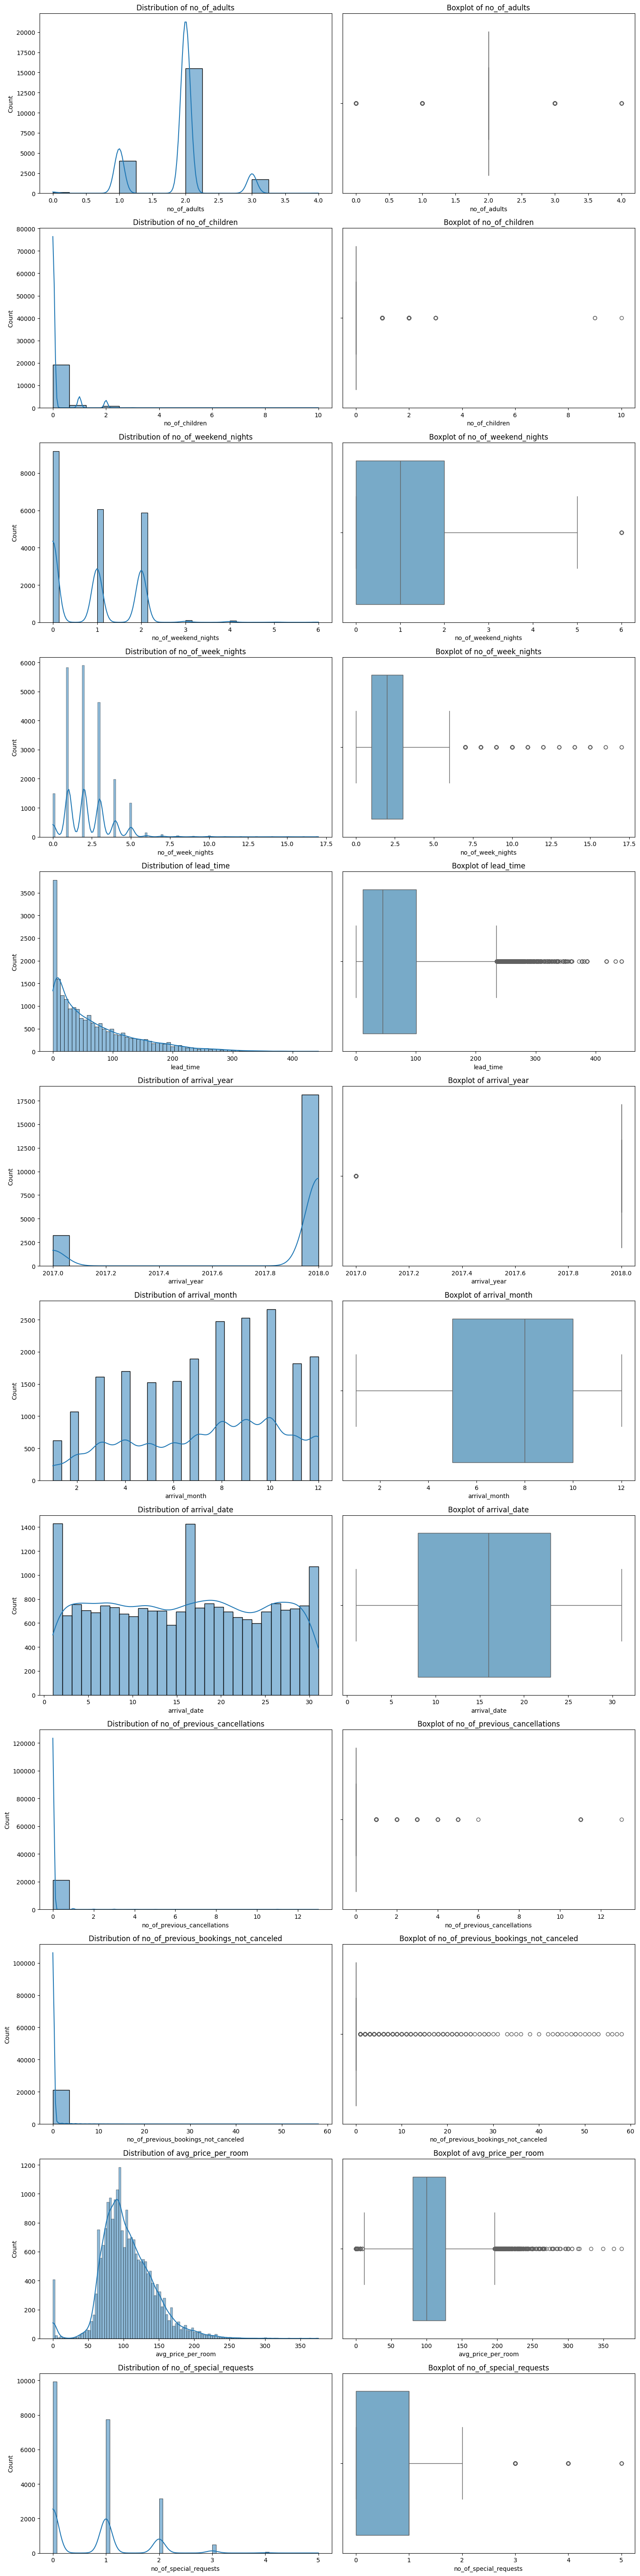

In [26]:
num_plot_dist(df, num_cols)

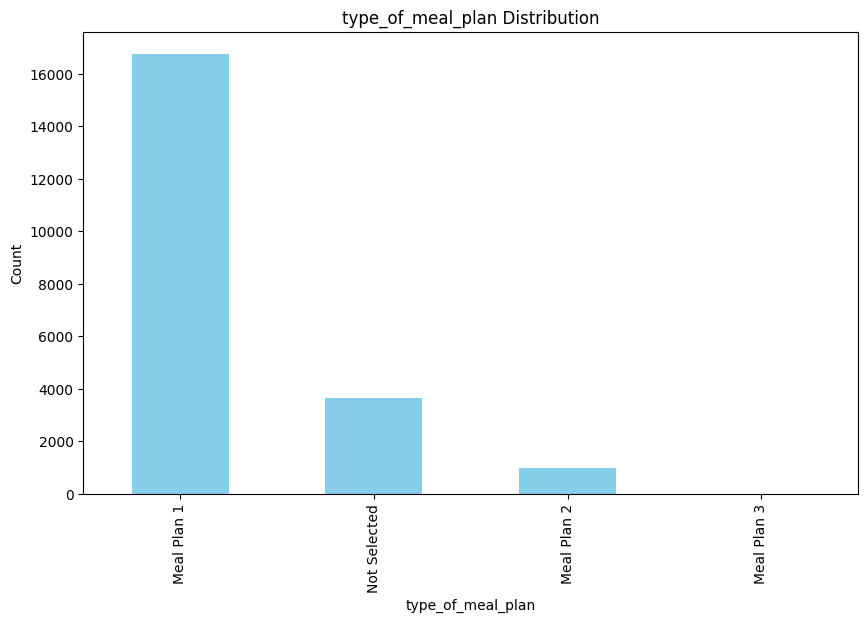

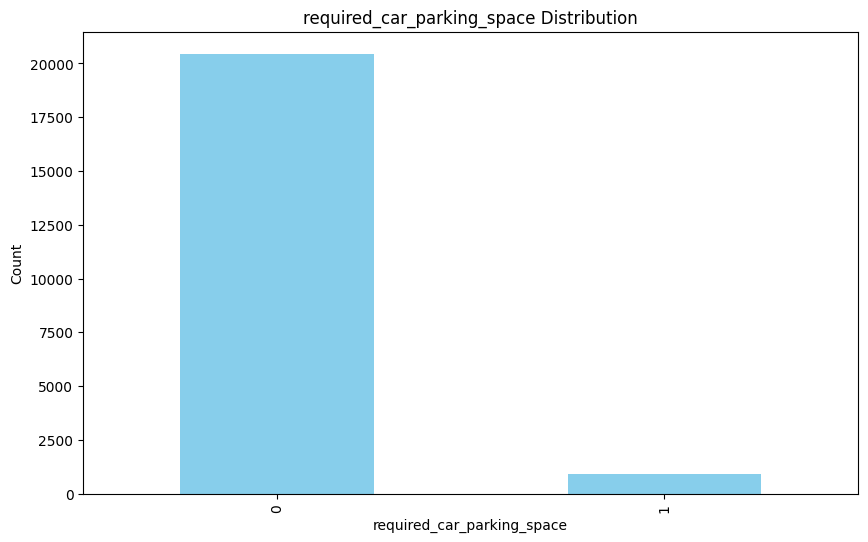

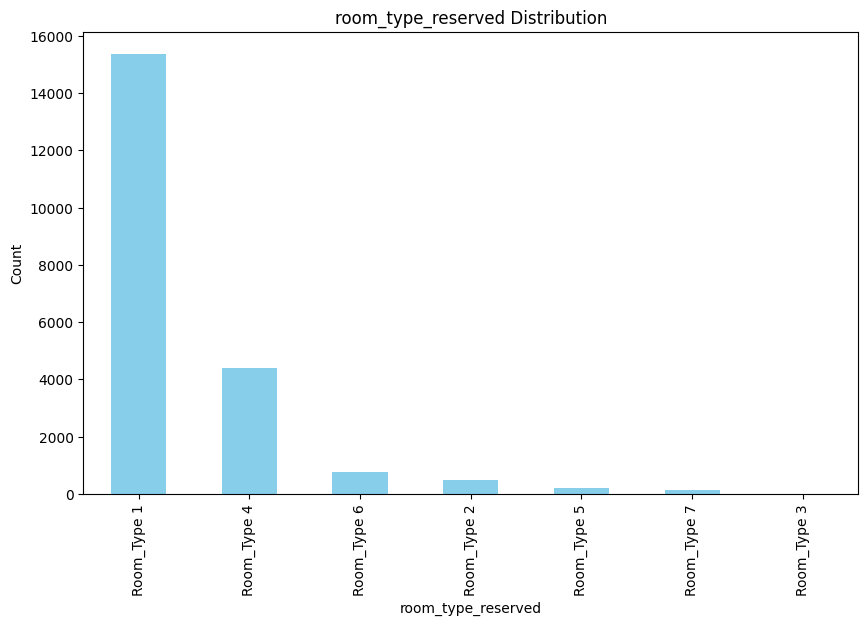

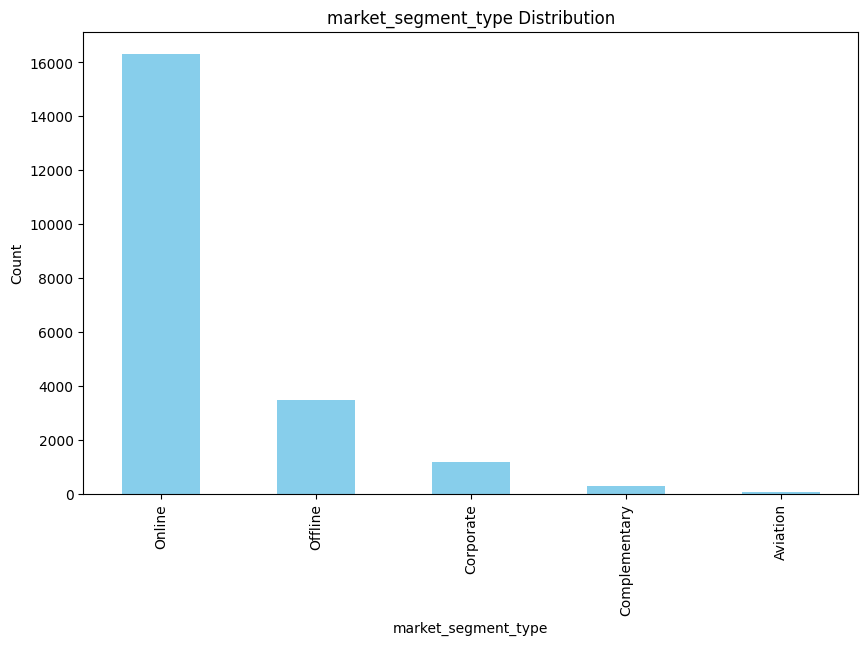

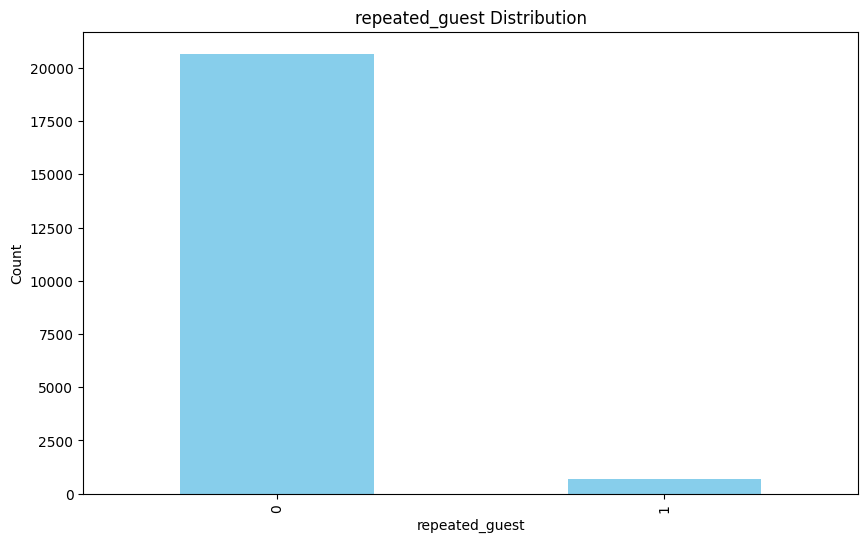

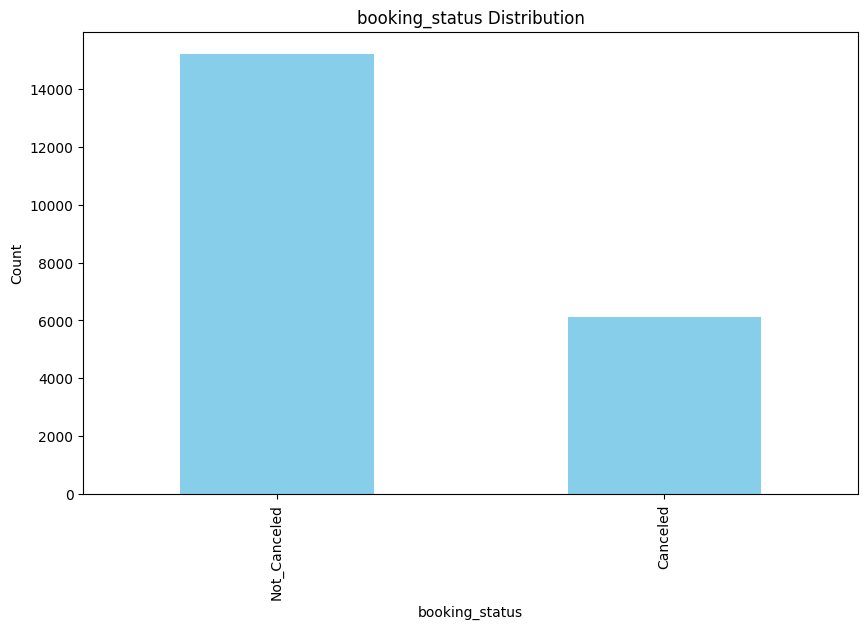

In [27]:
for cat_features in cat_cols:
    plt.figure(figsize=(10, 6))
    df[cat_features].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_features} Distribution')
    plt.xlabel(cat_features)
    plt.ylabel('Count')
    plt.show()


#### Bivariate Analysis

In [28]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], palette="Blues")
        axes[i].set_title(f'{target} vs {column}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(column)

    plt.tight_layout()
    plt.show()

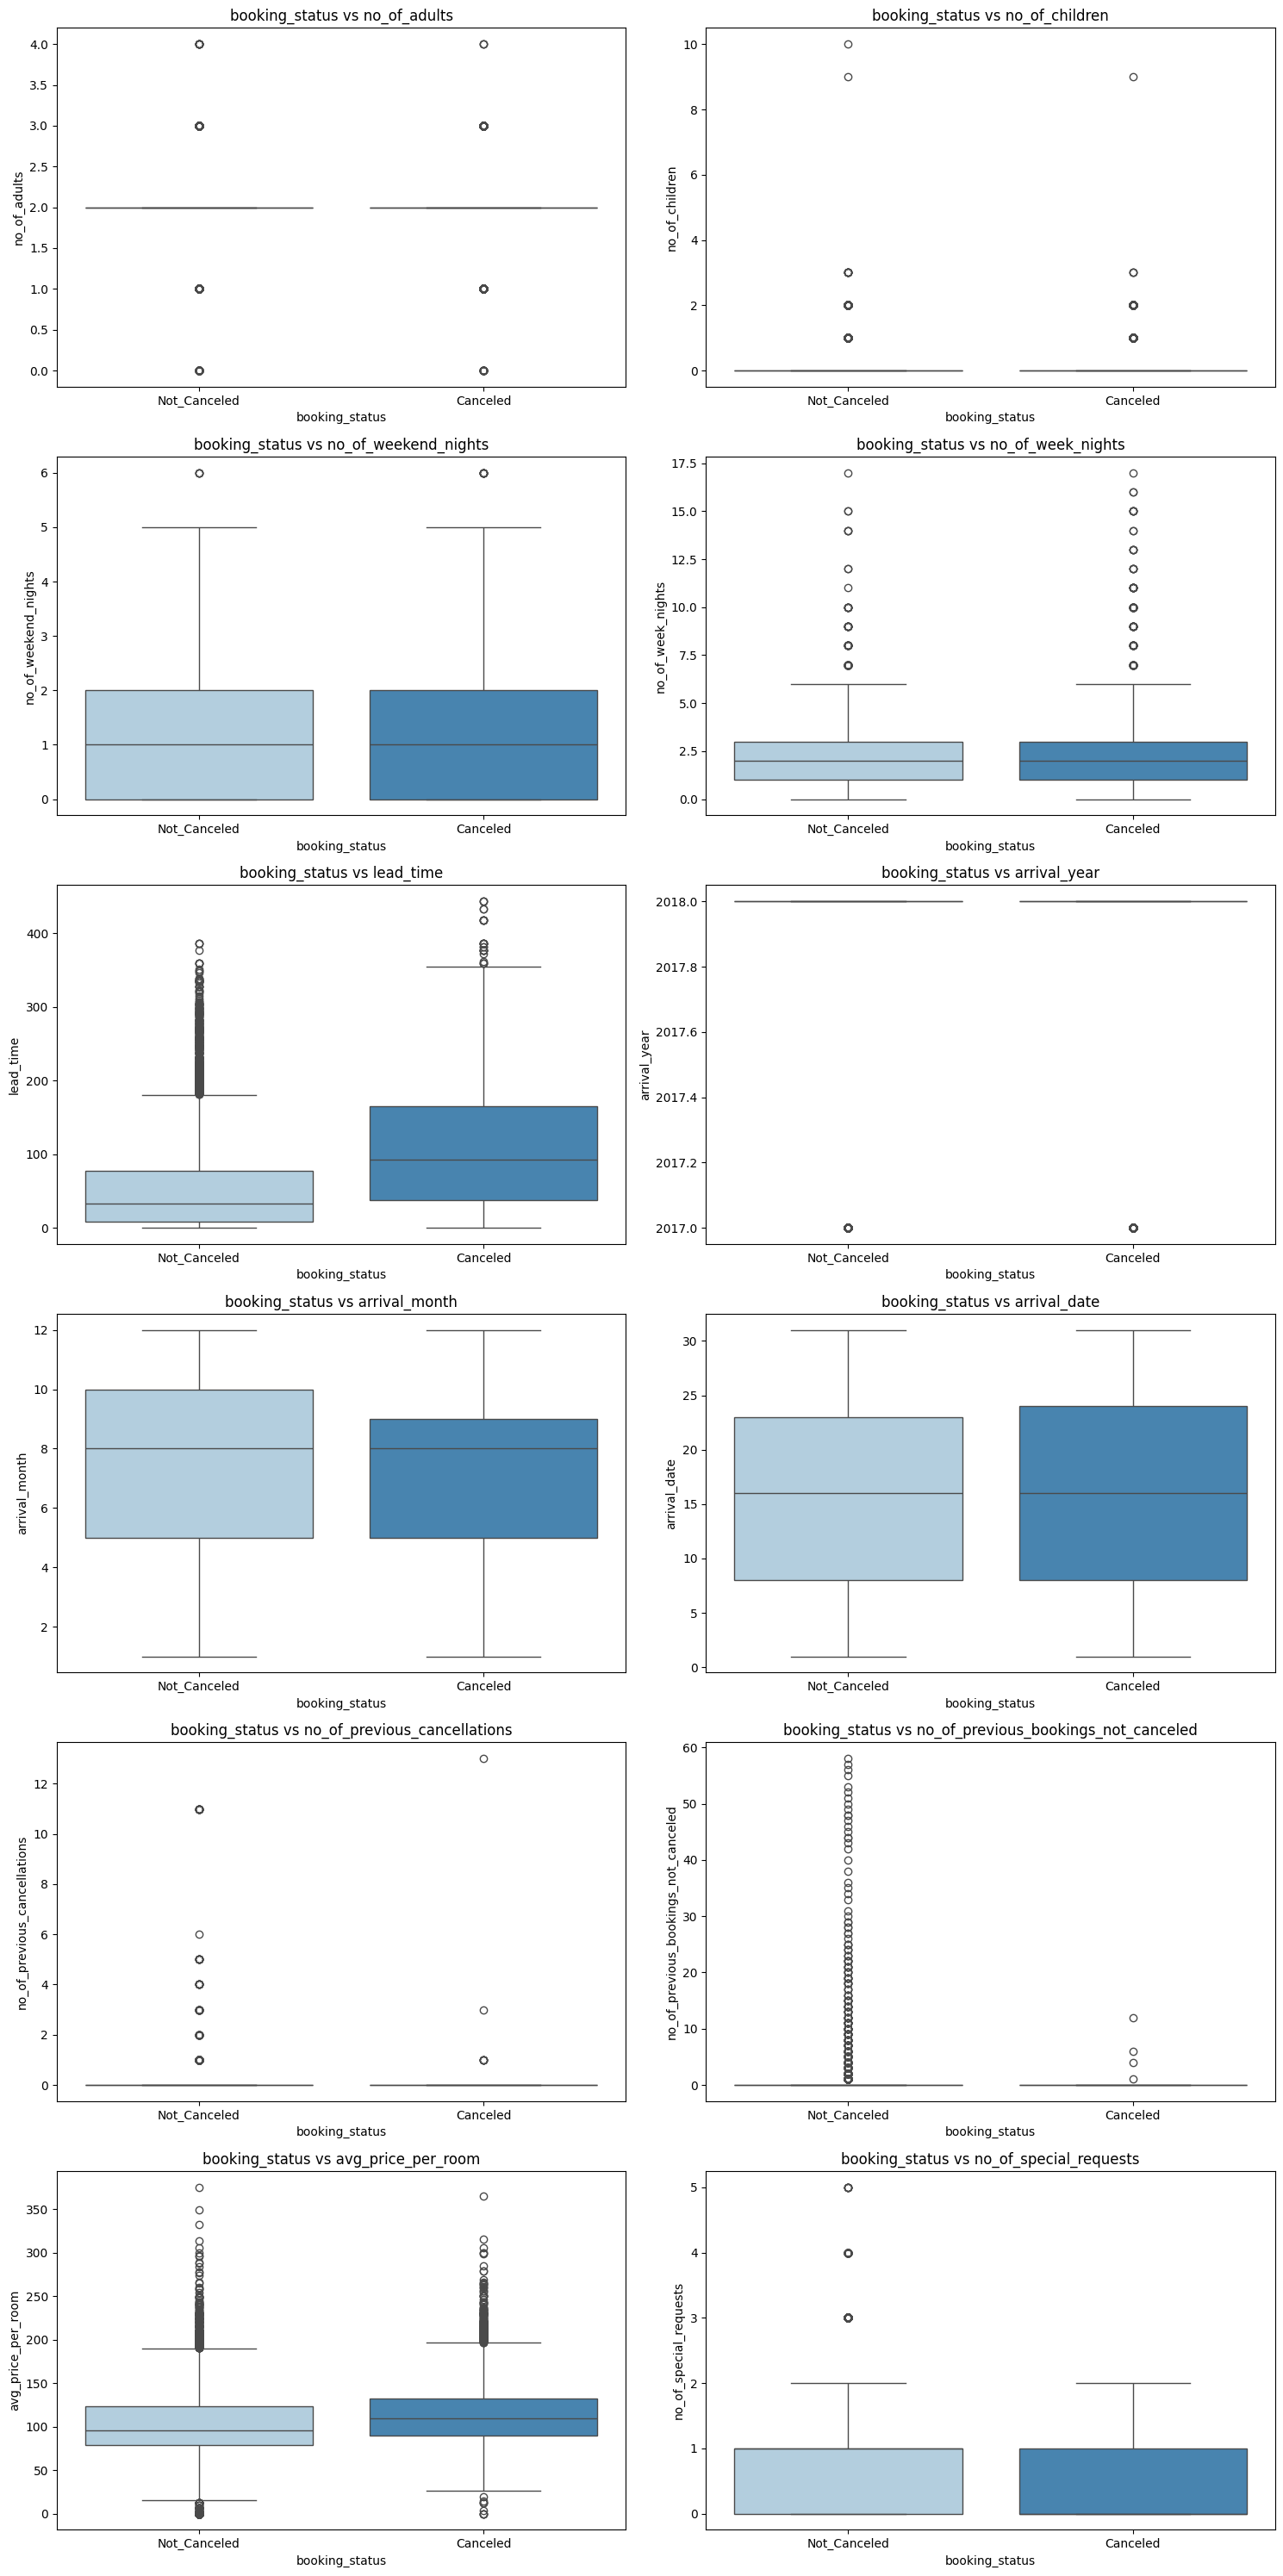

In [29]:
plot_bivariate_num(df, 'booking_status', num_cols)

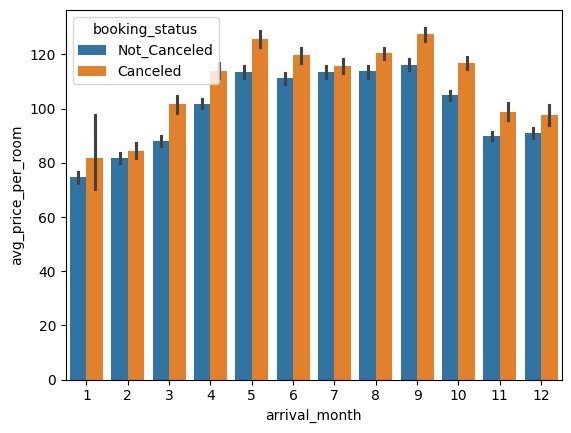

In [31]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=df, hue='booking_status')
plt.show()


In [ ]:
def plot_bivariate_cat(df, target, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(cat_features):
        sns.countplot(data=df, x=column, hue=target, ax=axes[i], palette="Blues")
        axes[i].set_title(f'{target} vs {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

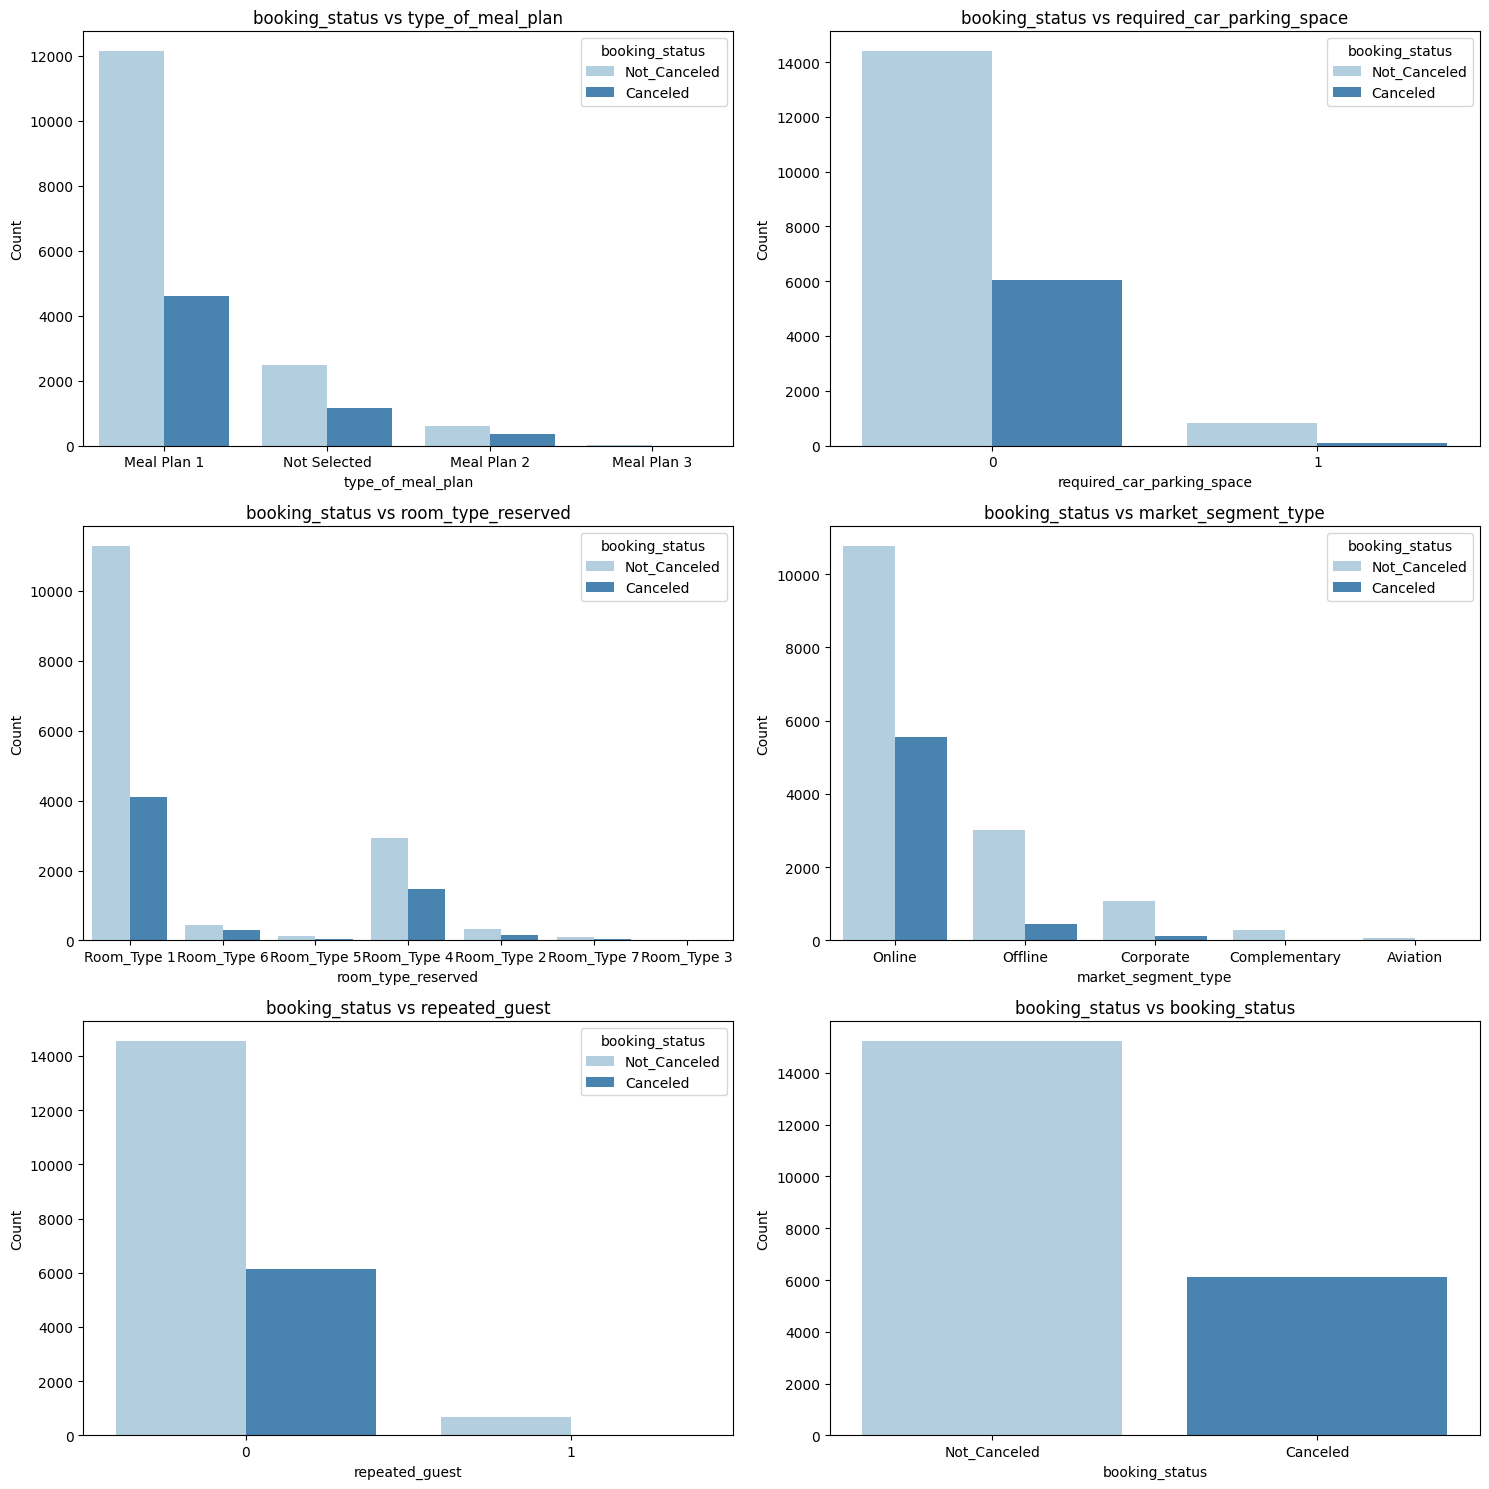

In [33]:
plot_bivariate_cat(df, 'booking_status', cat_cols)

### DATA PROCESSING

In [34]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [36]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    

In [38]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [45]:
x = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [46]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


##### Data doesn't have multicollinearity

In [47]:
corr = df.corr()

<Axes: >

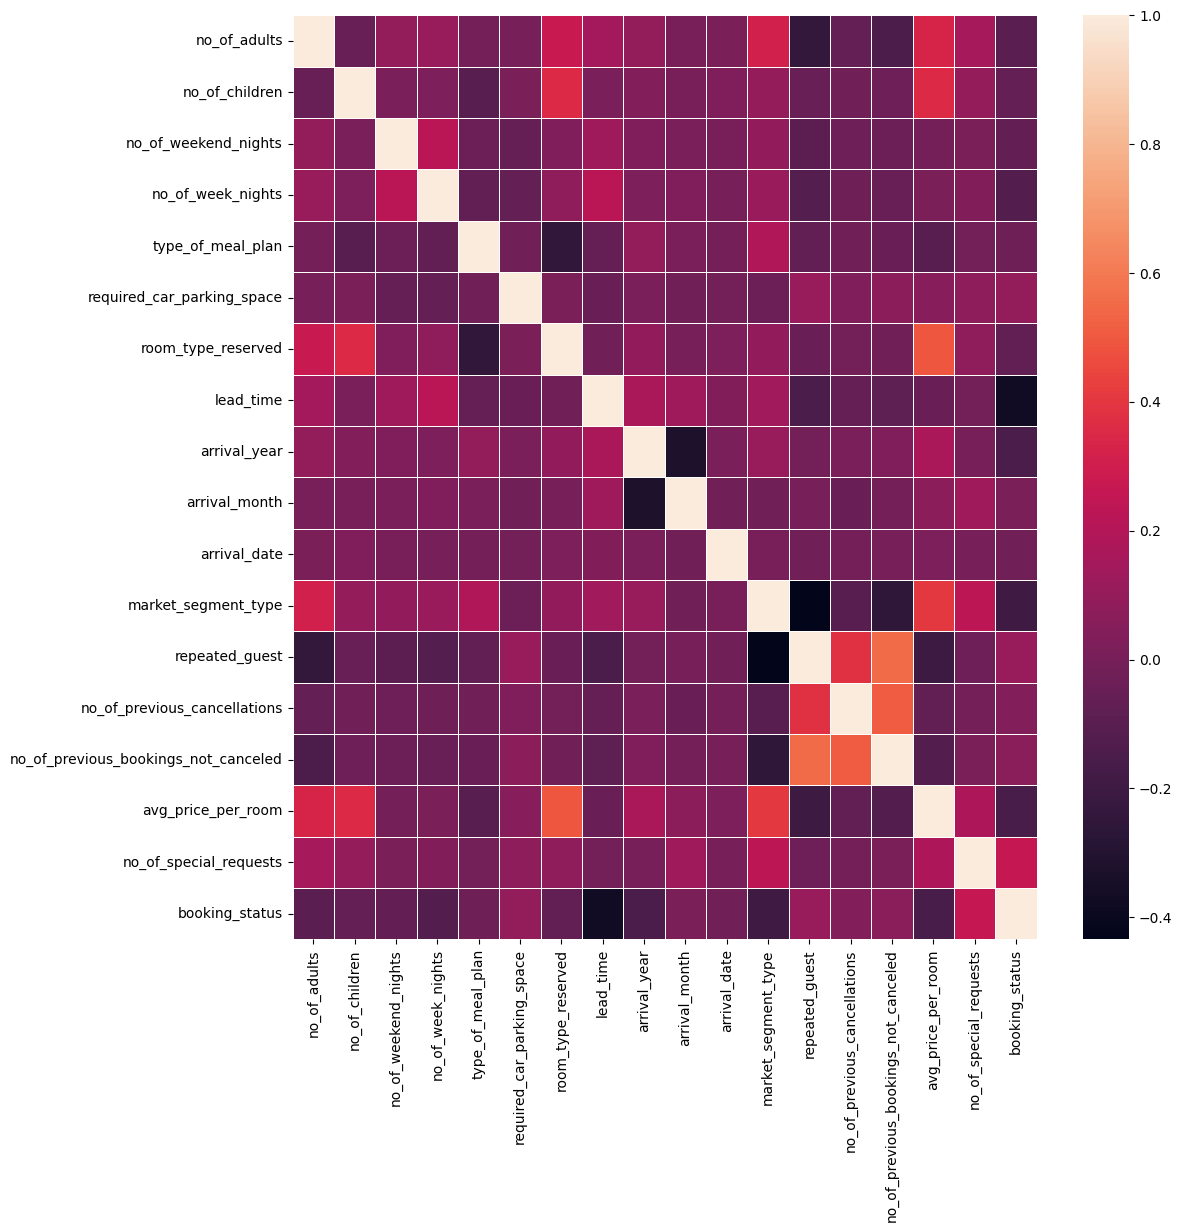

In [50]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, linewidths=0.5)

#### Skewness

In [54]:
skewness = df.skew()

In [55]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [53]:
for col in df.columns:
    if abs(skewness[col]) > 5:
        df[col] = np.log1p(df[col])
        print(f"Applied log transformation to {col}")

Applied log transformation to repeated_guest
Applied log transformation to no_of_previous_cancellations
Applied log transformation to no_of_previous_bookings_not_canceled


#### Imbalanced Data

In [56]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [57]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']

In [58]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [59]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [62]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [64]:
balanced_df = pd.DataFrame(x_res, columns=x.columns)
balanced_df['booking_status'] = y_res

In [66]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30462 entries, 0 to 30461
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          30462 non-null  int64  
 1   no_of_children                        30462 non-null  int64  
 2   no_of_weekend_nights                  30462 non-null  int64  
 3   no_of_week_nights                     30462 non-null  int64  
 4   type_of_meal_plan                     30462 non-null  int64  
 5   required_car_parking_space            30462 non-null  int64  
 6   room_type_reserved                    30462 non-null  int64  
 7   lead_time                             30462 non-null  int64  
 8   arrival_year                          30462 non-null  int64  
 9   arrival_month                         30462 non-null  int64  
 10  arrival_date                          30462 non-null  int64  
 11  market_segment_

In [67]:
balanced_df.shape

(30462, 18)

In [68]:
df = balanced_df.copy()

### Feature Selection

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']

In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

RandomForestClassifier(random_state=42)

In [80]:
feature_importance = model.feature_importances_

In [81]:
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importance})

In [85]:
feature_importance_df

,feature,importance
7,lead_time,0.261140
16,no_of_special_requests,0.183490
15,avg_price_per_room,0.148713
9,arrival_month,0.086560
10,arrival_date,0.084416
11,market_segment_type,0.058476
3,no_of_week_nights,0.044465
2,no_of_weekend_nights,0.030436
4,type_of_meal_plan,0.020160
6,room_type_reserved,0.019279


In [86]:
top_important_feature_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [87]:
top_important_feature_df

,feature,importance
7,lead_time,0.261140
16,no_of_special_requests,0.183490
15,avg_price_per_room,0.148713
9,arrival_month,0.086560
10,arrival_date,0.084416
11,market_segment_type,0.058476
3,no_of_week_nights,0.044465
2,no_of_weekend_nights,0.030436
4,type_of_meal_plan,0.020160
6,room_type_reserved,0.019279


In [88]:
top_10_features = top_important_feature_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]


In [91]:
top_10_df.columns

Index(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved', 'booking_status'],
      dtype='object')

In [ ]:
df = top_10_df.copy()

## MODEL SELECTION

In [92]:
!pip install xgboost lightgbm

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5a/0b/f9f815f240a9610d42367172b9f7ef7e8c9113a09b1bb35d4d85f96b910a/xgboost-3.0.0-py3-none-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/21/1b/550ee378512b78847930f5d74228ca1fdba2a7fbdeaac9aeccc085b0e257/lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.9 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [94]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Logistic Regression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Support Vector Machine" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "AdaBoost" : AdaBoostClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42),
    "LightGBM" : LGBMClassifier(random_state=42)
}

In [97]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [98]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred= classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    




[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [99]:
metrics_df = pd.DataFrame(metrics)

In [100]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.897752,0.898404,0.898697,0.898551
1,Logistic Regression,0.786148,0.797575,0.771336,0.784236
2,Gradient Boosting,0.844247,0.828837,0.870684,0.849245
3,Support Vector Machine,0.665682,0.641391,0.763192,0.697010
4,Decision Tree,0.845725,0.855237,0.835179,0.845089
5,KNN,0.779419,0.857794,0.673941,0.754834
6,Naive Bayes,0.577056,0.906096,0.179153,0.299157
7,AdaBoost,0.799442,0.808205,0.789251,0.798616
8,XGBoost,0.887904,0.882655,0.896743,0.889643
9,LightGBM,0.876416,0.864194,0.895440,0.879539


### TRAIN THE RANDOM FOREST MODEL ( as it has the best performance )

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [102]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
rf = RandomForestClassifier(random_state=42)

In [105]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,15),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap': [True, False],
}

In [106]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [107]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   3.6s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   3.6s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   3.5s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   3.4s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   3.6s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   5.3s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   5.5s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=8, n_estimators=221; total time=   5.3s
[

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11fc42dd0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11fc40950>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11fc42410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11f9f8b50>},
                   random_state=42, scoring='accuracy', verbose=2)

In [108]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 221}

In [109]:
best_rf_model = random_search.best_estimator_

In [110]:
y_pred = best_rf_model.predict(X_test)

In [111]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [112]:
accuracy

0.8787132775315937

In [113]:
precision

0.8600556070435589

#### Save the model

In [114]:
import joblib

In [115]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [116]:
loaded_model = joblib.load("random_forest.pkl")

In [117]:
X_train[0:1]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
4157,2,0,2,5,0,0,0,190,2017,9,8,4,0.0,0.0,0.0,93.5,1


In [118]:
new_data = np.array([2,0,2,5,0,0,0,190,2017,9,8,4,0.0,0.0,0.0,93.5,1])

In [119]:
predictions = loaded_model.predict(new_data.reshape(1, -1))

In [120]:
predictions

array([1])